In [203]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

1. En el preprocesamiento debe mostrar cuantos ejemplares hay por cada familia. En base a estos datos debe determinar si considera pertinente prescindir de ejemplares que tengan pocas observaciones.

In [204]:
# Directorio de datos
data_dir = 'malimg_paper_dataset_imgs2'

In [205]:
familias_malware = os.listdir(data_dir)
familias_malware

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.gen!g',
 'C2LOP.P',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [206]:
# Ejemplares de cada familia
for familia in familias_malware:
    print(f'{familia}: {len(os.listdir(os.path.join(data_dir, familia)))}')

Adialer.C: 122
Agent.FYI: 116
Allaple.A: 621
Allaple.L: 673
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.gen!g: 200
C2LOP.P: 146
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 470


Como se puede observar, se trato de balancear los datos, ya que algunas familias traían más de 2000 imagenes mientras que la más baja solo 80. Se decidió quitar de forma aleatoria algunos datos a las familias que tenían bastantes datos en vez de quitar las familias con menos datos, y así poder mantener todas las familias, ya que las familias con muchos datos eran únicamente 3, mientras que las que traían pocos eran los 22 restantes.

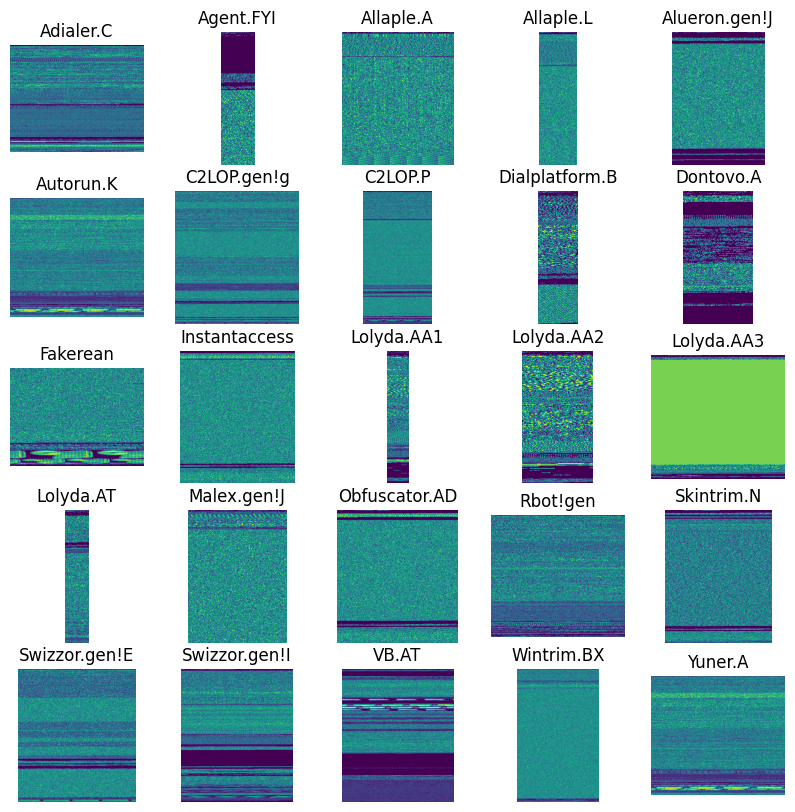

In [207]:
# Plotee las imágenes de los ejemplos de malware
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, familia in enumerate(familias_malware):
    ax[i//5, i%5].imshow(plt.imread(os.path.join(data_dir, familia, os.listdir(os.path.join(data_dir, familia))[0])))
    ax[i//5, i%5].set_title(familia)
    ax[i//5, i%5].axis('off')
plt.show()

In [208]:
img_height, img_width = 64, 64
batch_size = 128
epochs = 80

In [209]:
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=True)
class_indices = data_generator.class_indices
num_classes = len(class_indices)

Found 5763 images belonging to 25 classes.


In [210]:
# Balancear datos de Allaple.A: 2949 Allaple.L: 1591 con respecto al resto (150)


In [211]:
# Division de datos en entrenamiento y prueba

X, y = data_generator.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [212]:
# Creación del modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [213]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),  # añadir capa de Dropout con una tasa de 0.5
#     Dense(num_classes, activation='softmax')
# ])

In [214]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 6, 6, 128)      

In [215]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/80
1/1 [==============================] - 1s 737ms/step - loss: 3.2405 - accuracy: 0.0225 - val_loss: 3.2650 - val_accuracy: 0.0769
Epoch 2/80
1/1 [==============================] - 0s 228ms/step - loss: 3.0593 - accuracy: 0.1348 - val_loss: 3.3060 - val_accuracy: 0.0769
Epoch 3/80
1/1 [==============================] - 0s 229ms/step - loss: 3.1095 - accuracy: 0.1461 - val_loss: 3.1928 - val_accuracy: 0.0256
Epoch 4/80
1/1 [==============================] - 0s 234ms/step - loss: 2.9385 - accuracy: 0.1236 - val_loss: 3.0941 - val_accuracy: 0.0769
Epoch 5/80
1/1 [==============================] - 0s 246ms/step - loss: 2.8765 - accuracy: 0.2022 - val_loss: 3.0587 - val_accuracy: 0.1026
Epoch 6/80
1/1 [==============================] - 0s 244ms/step - loss: 2.9913 - accuracy: 0.1573 - val_loss: 3.0422 - val_accuracy: 0.1026
Epoch 7/80
1/1 [==============================] - 0s 254ms/step - loss: 3.0085 - accuracy: 0.1124 - val_loss: 3.0364 - val_accuracy: 0.1282
Epoch 8/80
1/1 [====

In [216]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 8ms/step - loss: 1.9626 - accuracy: 0.7692
Loss: 1.9626, Accuracy: 0.7692


In [217]:
# Métricas del modelo
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
unique_labels = np.unique(y_true)
unique_class_names = [list(class_indices.keys())[i] for i in unique_labels]
print(classification_report(y_true, y_pred, labels=unique_labels, target_names=unique_class_names))
print(confusion_matrix(y_true, y_pred, labels=unique_labels))

2/2 [==============================] - 0s 6ms/step
                precision    recall  f1-score   support

     Agent.FYI       1.00      1.00      1.00         1
     Allaple.A       0.43      1.00      0.60         3
     Allaple.L       0.50      0.67      0.57         3
 Alueron.gen!J       1.00      1.00      1.00         1
   C2LOP.gen!g       1.00      0.50      0.67         2
Dialplatform.B       0.50      1.00      0.67         1
      Fakerean       1.00      1.00      1.00         1
 Instantaccess       1.00      1.00      1.00         5
    Lolyda.AA2       1.00      1.00      1.00         3
    Lolyda.AA3       1.00      1.00      1.00         2
     Lolyda.AT       0.00      0.00      0.00         2
   Malex.gen!J       0.00      0.00      0.00         1
 Obfuscator.AD       1.00      1.00      1.00         1
      Rbot!gen       1.00      1.00      1.00         1
 Swizzor.gen!I       0.00      0.00      0.00         3
         VB.AT       1.00      1.00      1.00       

c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Se puede observar que se obtuvo un modelo aceptable con precision, recall y f1 buenos que servirá para detectar a qué familia pertenece un malware a partir de las imagenes de los malware.